6. Kalman Filter for Robot Localization


Simple 1D Kalman Filter for estimating position from noisy measurements.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3128 (\N{TELUGU LETTER SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3109 (\N{TELUGU LETTER THA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3081 (\N{TELUGU LETTER U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3098 (\N{TELUGU LETTER CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3077 (\N{TELUGU LETTER A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/

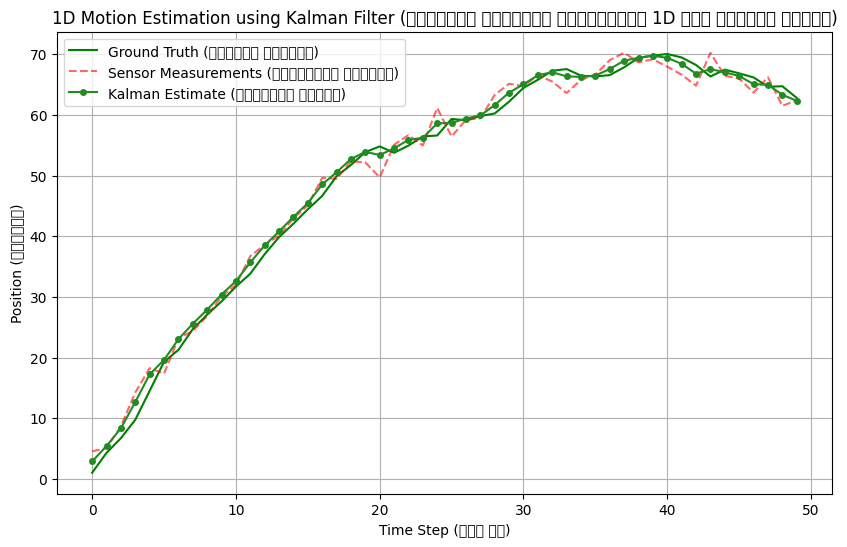

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
# పునరావృతం కోసం రాండమ్ సీడ్ సెట్ చేయండి
np.random.seed(0)

# Time interval
# సమయం మధ్యంతరాన్ని సెట్ చేయండి
delta_t = 1.0

# Initial state: [position, velocity]
# ప్రారంభ స్థితి: [స్థానం, వేగం]
state = np.array([[0], [1]])

# State transition model
# రాష్ట్ర మార్పిడి నమూనా
F = np.array([[1, delta_t],
              [0, 1]])

# Measurement model (only position is observed)
# కొలత నమూనా (కేవలం స్థానం మాత్రమే గమనించబడింది)
H = np.array([[1, 0]])

# Noise covariances
# శబ్ద వ్యత్యాసాలు
process_noise = np.eye(2) * 0.05
measurement_noise = np.eye(1) * 4

# Initial estimation uncertainty
# ప్రారంభ అంచనా అవిశ్వసనీయత
cov_estimate = np.eye(2)

# Data storage
# డేటా నిల్వ
actual_positions = []
sensor_readings = []
kalman_estimates = []

# Simulation and filtering loop
# సిమ్యులేషన్ మరియు ఫిల్టరింగ్ లూప్
for _ in range(50):
    # Simulate true movement
    # నిజమైన చలనం అనుకరించండి
    state = F @ state
    actual_positions.append(state[0, 0])

    # Simulate noisy sensor reading
    # శబ్దంతో కూడిన సెన్సార్ రీడింగ్ అనుకరించండి
    measurement = state[0, 0] + np.random.randn() * 2
    sensor_readings.append(measurement)

    # Predict step
    # అంచనా దశ
    predicted_state = F @ state
    predicted_cov = F @ cov_estimate @ F.T + process_noise

    # Kalman gain computation
    # కల్‌మాన్ గెయిన్ లెక్కింపు
    S = H @ predicted_cov @ H.T + measurement_noise
    K = predicted_cov @ H.T @ np.linalg.inv(S)

    # Update step
    # నవీకరణ దశ
    state = predicted_state + K @ (measurement - H @ predicted_state)
    cov_estimate = (np.eye(2) - K @ H) @ predicted_cov

    kalman_estimates.append(state[0, 0])

# Plot results with Green color background and Green markers
# ఫలితాలను ఆకుపచ్చ నేపథ్యంతో మరియు ఆకుపచ్చ మార్కర్లతో ప్లాట్ చేయండి
plt.figure(figsize=(10, 6))

# Plot ground truth, sensor measurements, and Kalman estimate
# గ్రౌండ్ ట్రూత్, సెన్సార్ కొలతలు మరియు కల్‌మాన్ అంచనా గ్రమీకరణ
plt.plot(actual_positions, label='Ground Truth (నిజమైన స్థానం)', color='green')  # Green for ground truth
plt.plot(sensor_readings, label='Sensor Measurements (సెన్సార్ కొలతలు)', color='red', linestyle='--', alpha=0.6)  # Red for noisy measurements
plt.plot(kalman_estimates, label='Kalman Estimate (కల్‌మాన్ అంచనా)', color='forestgreen', marker='o', markersize=4)  # Green for Kalman estimates

# Final plot settings
# చివరి ప్లాట్ సెట్టింగులు
plt.title("1D Motion Estimation using Kalman Filter (కల్‌మాన్ ఫిల్టర్ ఉపయోగించి 1D గమన మార్గం అంచనా)")
plt.xlabel("Time Step (సమయ దశ)")
plt.ylabel("Position (స్థానం)")
plt.legend()
plt.grid(True)
plt.show()
